In [8]:
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

INPUT_PATH = '../Datasets/Evaluations/Sentiment_Analysis.csv'
OUTPUT_PATH = '../Datasets/Evaluations/Evaluation_Sentiment_Analysis.csv'
PROMPT_NAME = 'prompt_3_zeroshot_single_term'
MODEL = 'gpt-3.5-turbo'

df_data = pd.read_csv(INPUT_PATH)
df_data = df_data.rename(columns={'polarity': 'y_true'})
df_data = df_data.rename(columns={'polarity_pred': 'y_pred'})


df_evaluation = pd.read_csv(OUTPUT_PATH)




In [10]:
def multiclass_eval(model, prompt, df):
    y_true = df['y_true']
    y_true = df['y_pred']
    cm = metrics.confusion_matrix(df['y_true'], df['y_pred'])
    cm
    plt.figure(figsize=(3,3))
    x_axis_labels = ['negative', 'neutral', 'positive']
    y_axis_labels = ['negative', 'neutral', 'positive']
    sns.heatmap(cm, annot=True, fmt="0.3f", linewidths=.5, square = True, cbar = 'False', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    # Display the plot
    plt.show()
    print(metrics.classification_report(df['y_true'], df['y_pred'], output_dict=False))
    classification_report = metrics.classification_report(df['y_true'], df['y_pred'], output_dict=True)

    df_output = pd.DataFrame(classification_report).transpose()
    
    
    
    
    

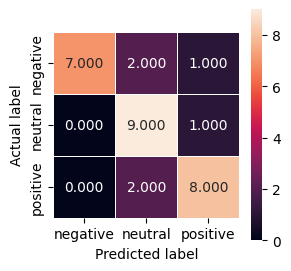

              precision    recall  f1-score   support

    negative       1.00      0.70      0.82        10
     neutral       0.69      0.90      0.78        10
    positive       0.80      0.80      0.80        10

    accuracy                           0.80        30
   macro avg       0.83      0.80      0.80        30
weighted avg       0.83      0.80      0.80        30



In [7]:
data = {'y_true' : ['positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'neutral','neutral','neutral','neutral','neutral','neutral','neutral','neutral','neutral','neutral', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative'], 'y_pred' : ['positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'neutral', 'neutral', 'neutral','neutral','neutral','neutral','neutral','neutral','neutral','neutral','neutral', 'positive', 'positive', 'neutral', 'neutral', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative']}
df = pd.DataFrame(data)
df
multiclass_eval('model', 'prompt', df)


In [ ]:
multiclass_eval(MODEL, PROMPT_NAME, df_data)